     ASSIGNMENT-02
     
Classify the email using the binary classification method. Email Spam detection has two 
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and 
Support Vector Machine for classification. Analyze their performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score

In [2]:
data = pd.read_csv("emails.csv")
data

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
data = data.drop('Email No.', axis=1)

In [4]:
data.shape

(5172, 3001)

In [5]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [7]:
data['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [8]:
X = data.drop('Prediction', axis = 1)
y = data['Prediction']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 2)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [11]:
y_pred = neigh.predict(X_test)

In [12]:
neigh.score(X_train, y_train)
neigh.score(X_test, y_test)

0.8734299516908213

In [13]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[686,  47],
       [ 84, 218]], dtype=int64)

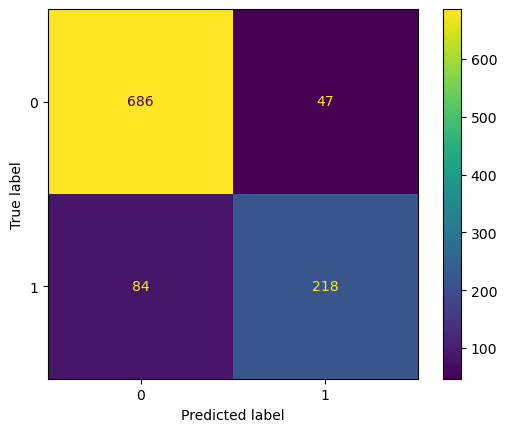

In [14]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       733
           1       0.82      0.72      0.77       302

    accuracy                           0.87      1035
   macro avg       0.86      0.83      0.84      1035
weighted avg       0.87      0.87      0.87      1035



In [16]:
print("accuracy_score: ")
accuracy_score(y_test, y_pred)

accuracy_score: 


0.8734299516908213

In [17]:
print("precision_score: ")
precision_score(y_test, y_pred)

precision_score: 


0.8226415094339623

In [18]:
print("recall_score: ")
recall_score(y_test, y_pred)

recall_score: 


0.7218543046357616

In [19]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.12657004830917873

In [20]:
from sklearn.svm import SVC
SVM = SVC(gamma = 'auto')
SVM.fit(X_train, y_train)

SVC(gamma='auto')

In [21]:
y_pred = SVC.predict(y_test)

TypeError: BaseSVC.predict() missing 1 required positional argument: 'X'

In [ ]:
SVM.score(X_train, y_train)
SVM.score(X_test, y_test)

0.8995169082125604

In [ ]:
print("Confusion Matrix: ")
cm = confusion_matrix(y_test, y_pred)
cm

Confusion Matrix: 


array([[697,  31],
       [ 73, 234]], dtype=int64)

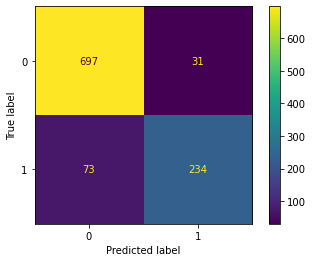

In [ ]:
mat = ConfusionMatrixDisplay(confusion_matrix = cm)
mat.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       728
           1       0.88      0.76      0.82       307

    accuracy                           0.90      1035
   macro avg       0.89      0.86      0.87      1035
weighted avg       0.90      0.90      0.90      1035



=== KNN Model ===
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       739
           1       0.82      0.71      0.76       296

    accuracy                           0.87      1035
   macro avg       0.86      0.83      0.84      1035
weighted avg       0.87      0.87      0.87      1035

Accuracy: 0.8743961352657005
Precision: 0.82421875
Recall: 0.7128378378378378
Error Rate: 0.12560386473429952


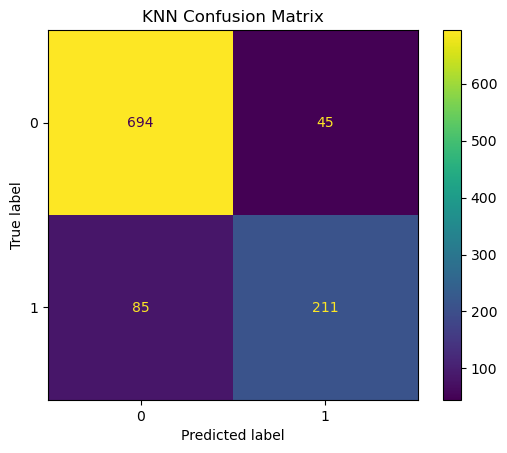


=== SVM Model ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       739
           1       0.89      0.79      0.84       296

    accuracy                           0.91      1035
   macro avg       0.91      0.87      0.89      1035
weighted avg       0.91      0.91      0.91      1035

Accuracy: 0.9120772946859903
Precision: 0.89272030651341
Recall: 0.7871621621621622
Error Rate: 0.0879227053140097


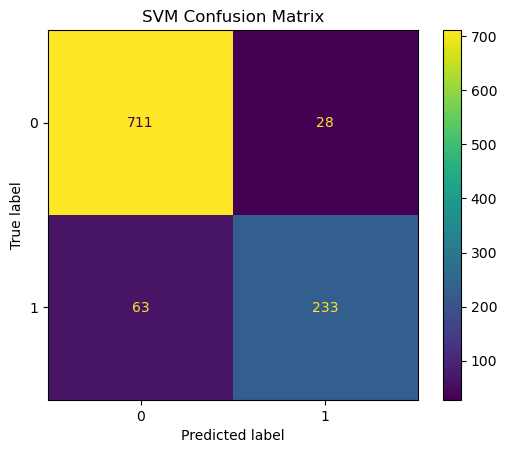

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv("emails.csv")

# Drop unnecessary column
data = data.drop('Email No.', axis=1)

# Split data
X = data.drop('Prediction', axis=1)
y = data['Prediction']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- KNN Model ----------------
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("=== KNN Model ===")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred_knn))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn)).plot()
plt.title("KNN Confusion Matrix")
plt.show()

# ---------------- SVM Model ----------------
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\n=== SVM Model ===")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svm)).plot()
plt.title("SVM Confusion Matrix")
plt.show()


  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
(5172, 3001)
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

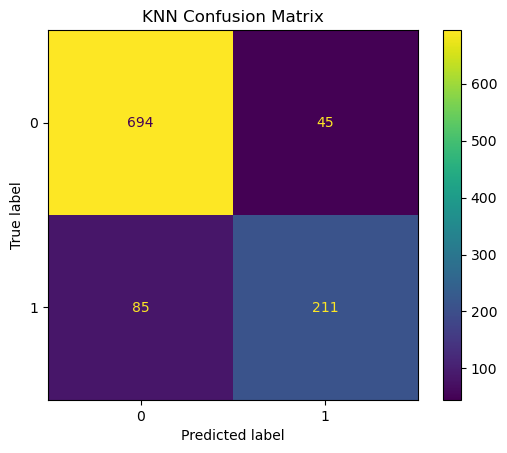

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       739
           1       0.82      0.71      0.76       296

    accuracy                           0.87      1035
   macro avg       0.86      0.83      0.84      1035
weighted avg       0.87      0.87      0.87      1035

Accuracy: 0.8743961352657005
Precision: 0.82421875
Recall: 0.7128378378378378
Error Rate: 0.12560386473429952

=== SVM MODEL PERFORMANCE ===
Training Accuracy: 0.9632583998066232
Testing Accuracy: 0.9120772946859903


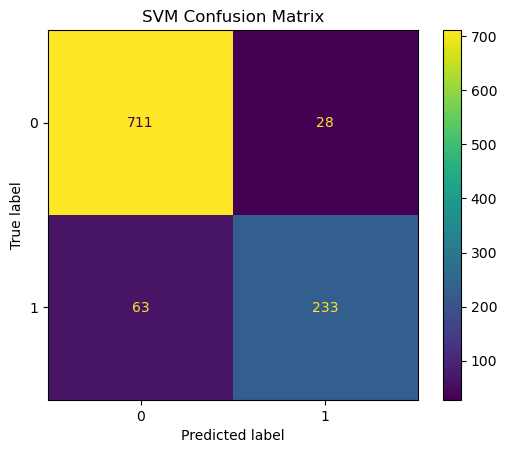

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       739
           1       0.89      0.79      0.84       296

    accuracy                           0.91      1035
   macro avg       0.91      0.87      0.89      1035
weighted avg       0.91      0.91      0.91      1035

Accuracy: 0.9120772946859903
Precision: 0.89272030651341
Recall: 0.7871621621621622
Error Rate: 0.0879227053140097


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    accuracy_score
)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv("emails.csv")
print(data.head())

# Drop unnecessary column
data = data.drop('Email No.', axis=1)

# Dataset info
print(data.shape)
print(data.info())
print(data['Prediction'].value_counts())

# Splitting data into features and labels
X = data.drop('Prediction', axis=1)
y = data['Prediction']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ---------------------------------------------------------
# K-Nearest Neighbors Classifier
# ---------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\n=== KNN MODEL PERFORMANCE ===")
print("Training Accuracy:", knn.score(X_train, y_train))
print("Testing Accuracy:", knn.score(X_test, y_test))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot()
plt.title("KNN Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred_knn))

# ---------------------------------------------------------
# Support Vector Machine Classifier
# ---------------------------------------------------------
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

# ❌ ERROR FIXED HERE: You used `SVC.predict(y_test)` instead of `svm.predict(X_test)`
y_pred_svm = svm.predict(X_test)

print("\n=== SVM MODEL PERFORMANCE ===")
print("Training Accuracy:", svm.score(X_train, y_train))
print("Testing Accuracy:", svm.score(X_test, y_test))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot()
plt.title("SVM Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred_svm))
